In [1]:
library(Seurat)
library(CellChat)
library(pheatmap)

Attaching SeuratObject

载入需要的程辑包：dplyr


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：igraph


载入程辑包：‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


载入需要的程辑包：ggplot2



## cellchat

In [2]:
object.list<-readRDS('./merge_sle_immunonolgy_communication_cellchat.rds')

In [4]:
names(object.list)<-c('HD','aSLE','cSLE')

In [12]:
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [13]:
cellchat

An object of class CellChat created from a merged object with multiple datasets 
 1009 signaling genes.
 393451 cells.

## Figure 3

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



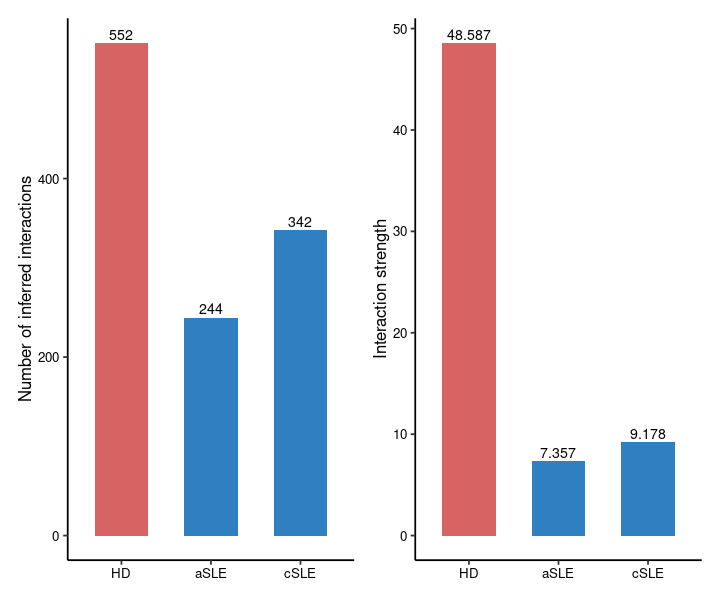

In [19]:
options(repr.plot.width=6,repr.plot.height=5)
gg1<-compareInteractions(cellchat, show.legend = F, group = c(1,2,2))+scale_fill_manual(values=c('#d86363','#2f7fc1'))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2,2), measure = "weight")+scale_fill_manual(values=c('#d86363','#2f7fc1'))
p<-gg1 + gg2
p
ggsave(p,file="./sle_picture/ALL/cellchat_bar.pdf",width = 6, height = 5)

Warning message in dir.create("./sle_picture/cellchat_sle_pic/"):
“'./sle_picture/cellchat_sle_pic'已存在”


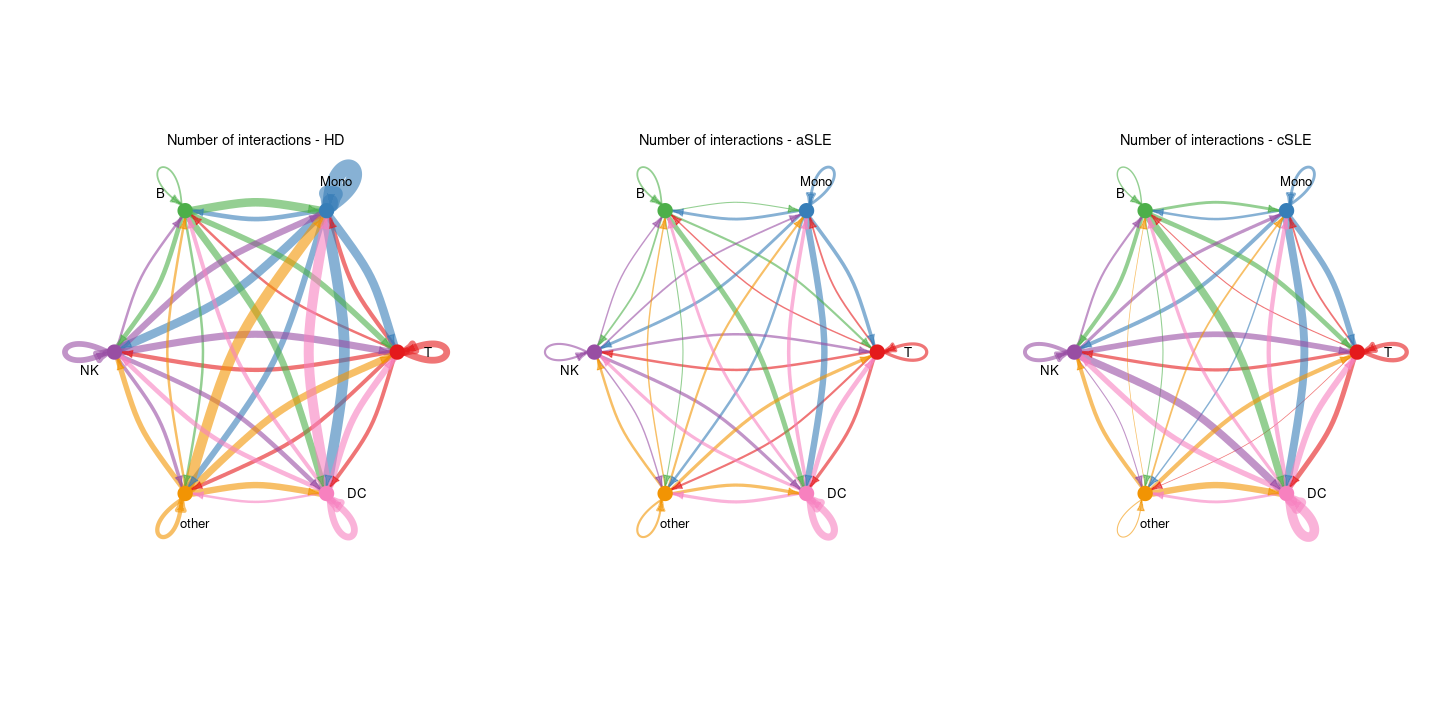

In [20]:
options(repr.plot.width=12,repr.plot.height=6)
dir.create("./sle_picture/cellchat_sle_pic/")
weight.max <- getMaxWeight(object.list, attribute = c("idents","count"))
par(mfrow = c(1,3), xpd=TRUE)

for (i in c(1,2,3)) {
  netVisual_circle(object.list[[i]]@net$count, weight.scale = T, label.edge= F, edge.weight.max = weight.max[2], edge.width.max = 12, title.name = paste0("Number of interactions - ", names(object.list)[i]))
}


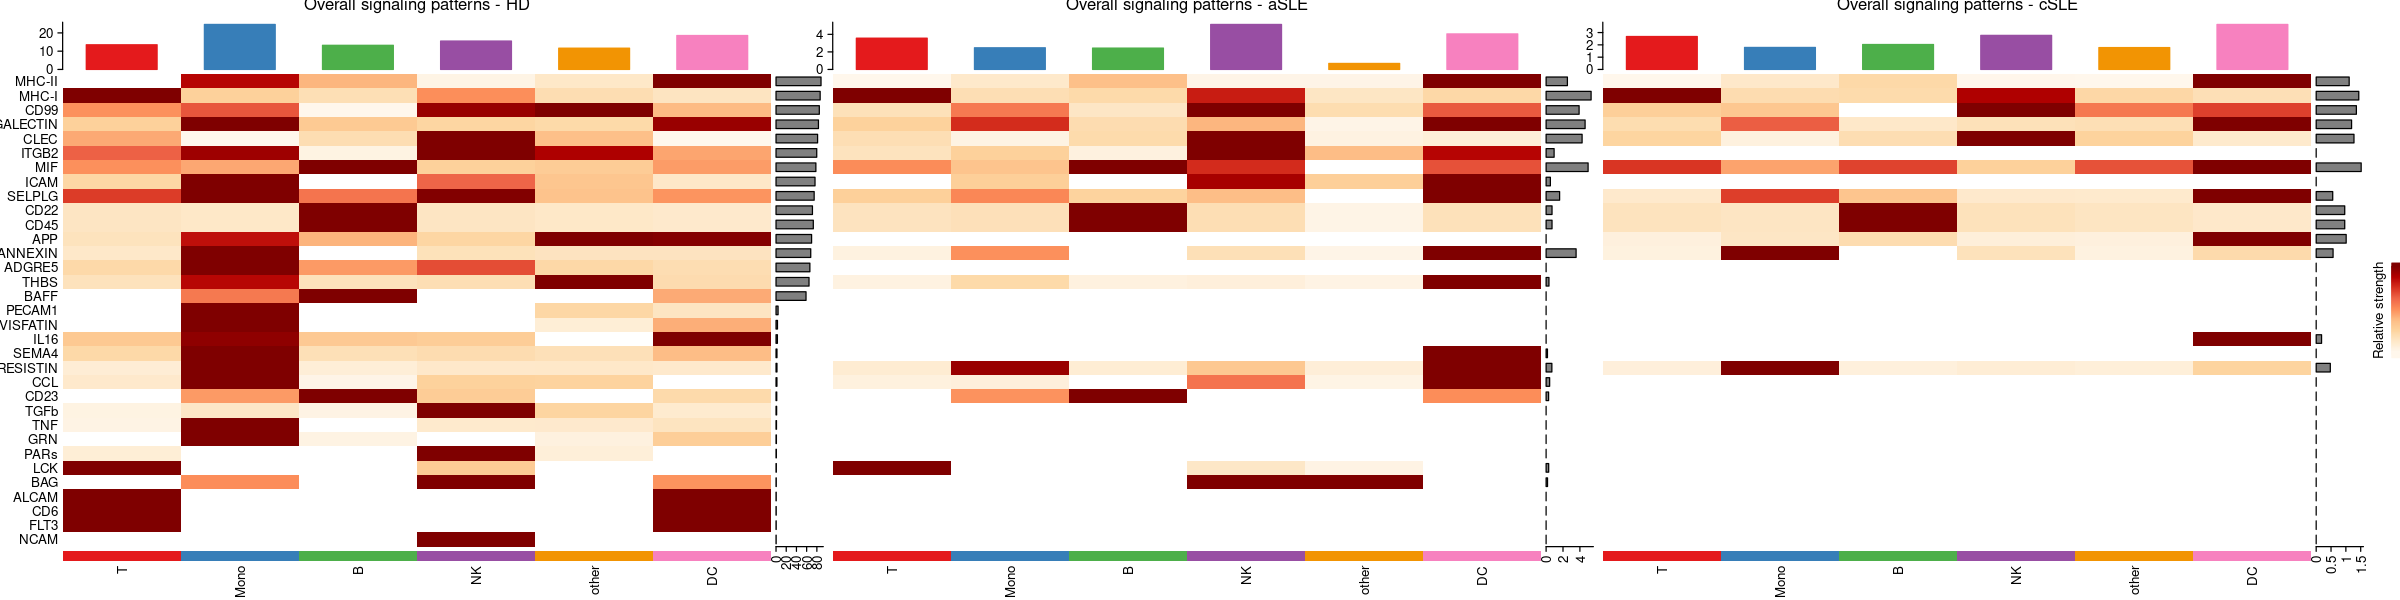

In [43]:
options(repr.plot.width=20)
library(ComplexHeatmap)
i = 1
# combining all the identified signaling pathways from different datasets 
pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", signaling = pathway.union, title = names(object.list)[i], width = 15, height = 10, color.heatmap = "OrRd")
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+2]], pattern = "all", signaling = pathway.union, title = names(object.list)[i+1], width = 15, height = 10, color.heatmap = "OrRd")
ht3 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "all", signaling = pathway.union, title = names(object.list)[i+2], width = 15, height = 10, color.heatmap = "OrRd")
#draw(ht1 + ht2, ht_gap = unit(0.5, "cm"))
ht1+ht2+ht3

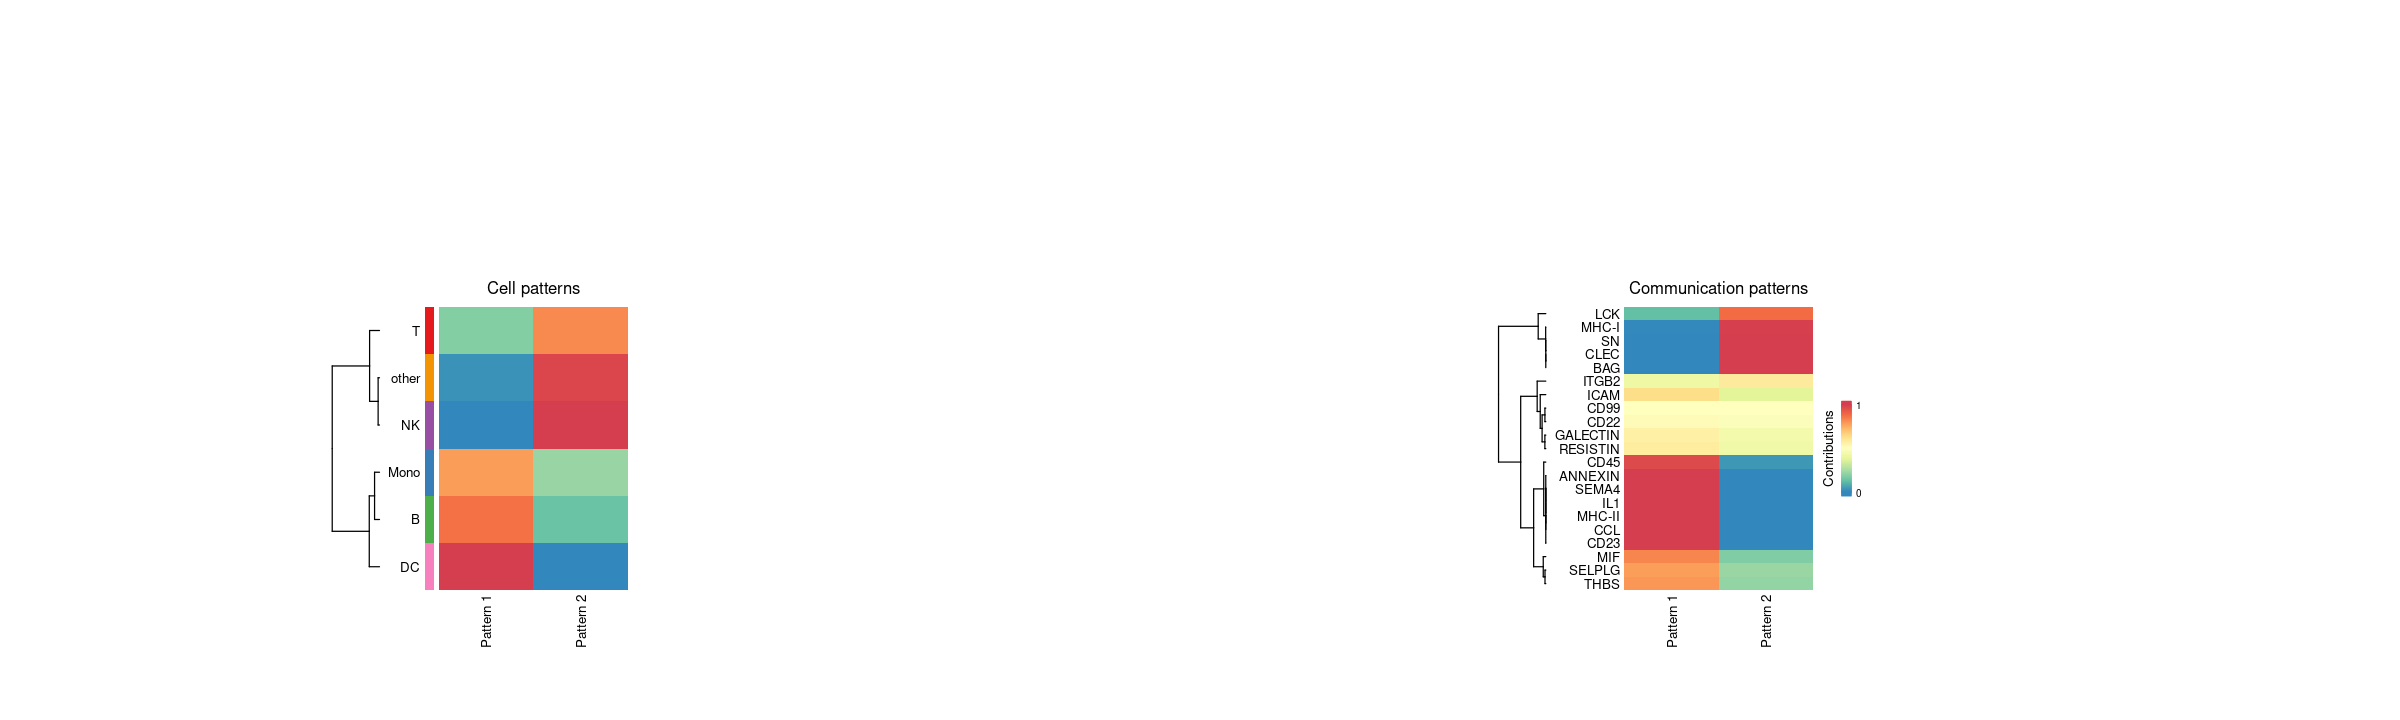

In [23]:
nPatterns = 3
object.list$HD <- identifyCommunicationPatterns(object.list$HD, pattern = "outgoing", k = nPatterns)
object.list$aSLE <- identifyCommunicationPatterns(object.list$aSLE, pattern = "outgoing", k = nPatterns)
object.list$cSLE <- identifyCommunicationPatterns(object.list$cSLE , pattern = "outgoing", k = nPatterns)
nPatterns = 2
object.list$HD <- identifyCommunicationPatterns(object.list$HD, pattern = "incoming", k = nPatterns)
object.list$aSLE <- identifyCommunicationPatterns(object.list$aSLE, pattern = "incoming", k = nPatterns)
object.list$cSLE <- identifyCommunicationPatterns(object.list$cSLE , pattern = "incoming", k = nPatterns)

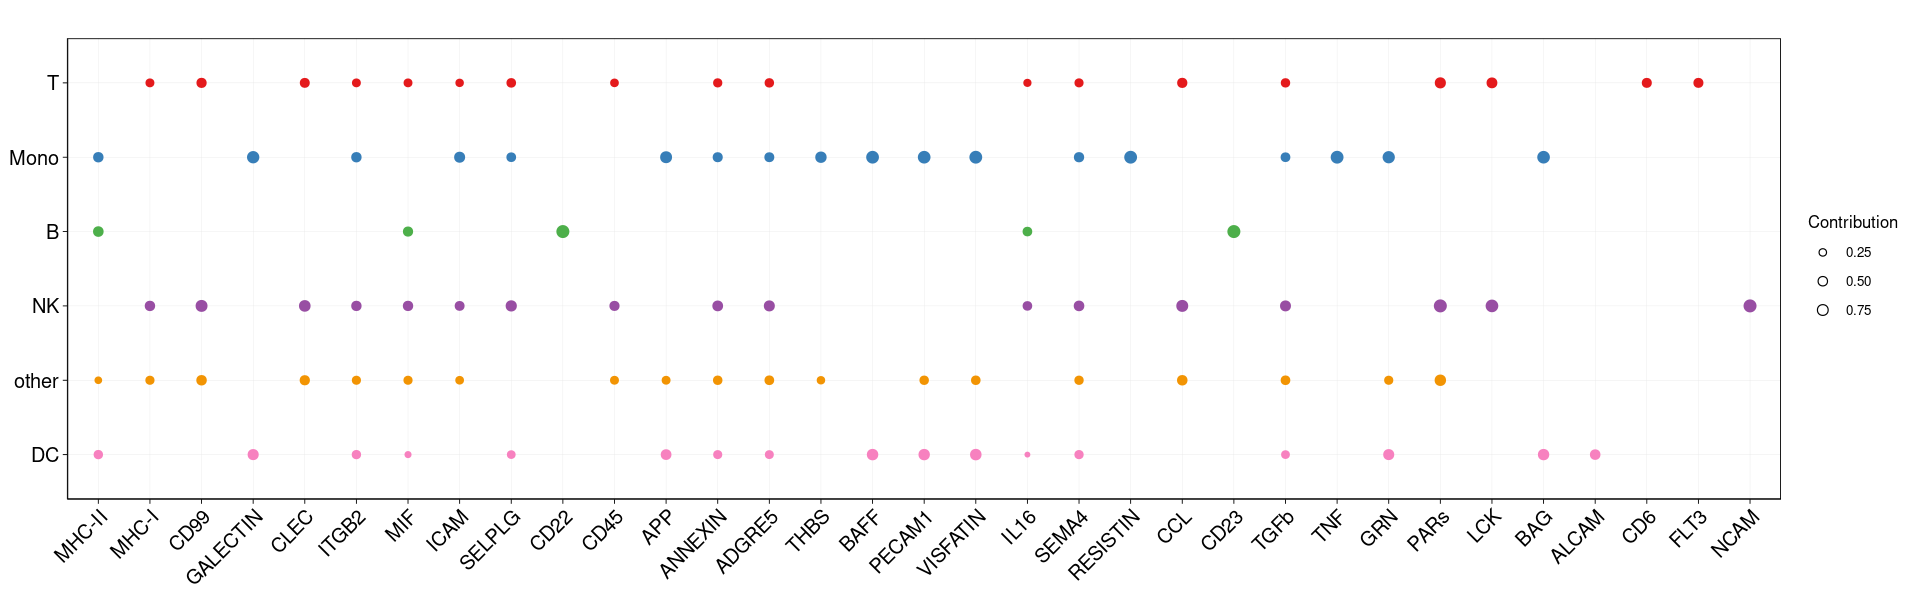

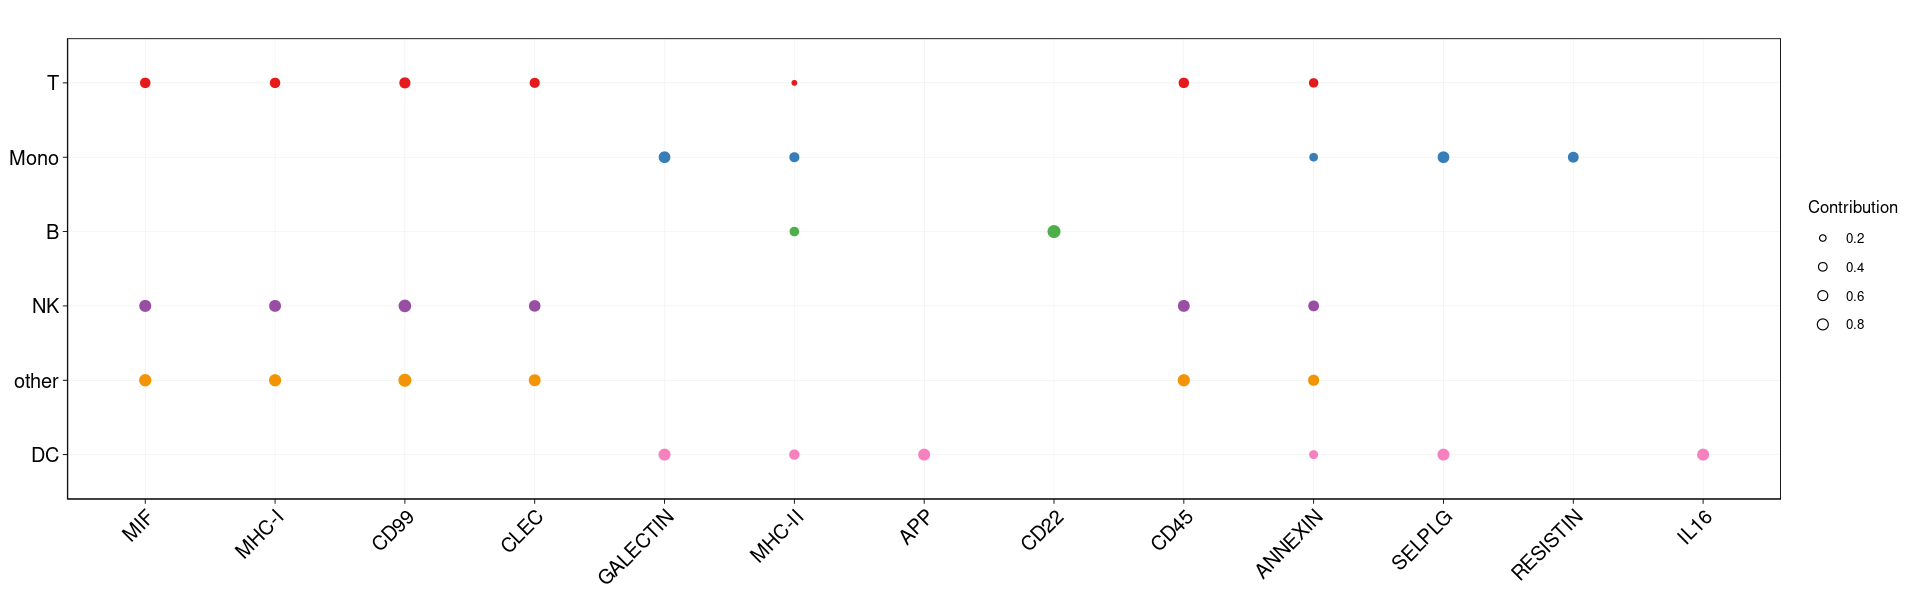

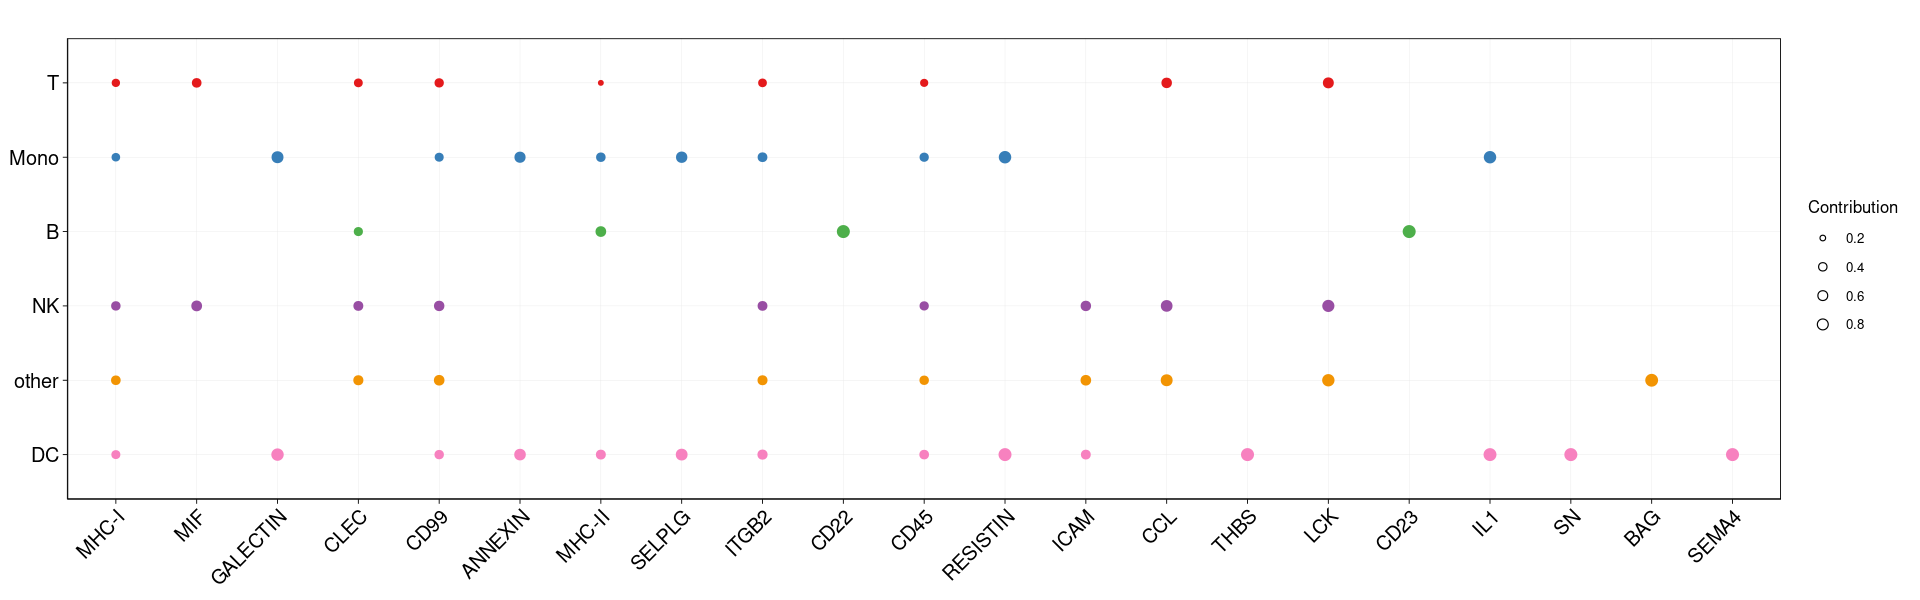

In [39]:
options(repr.plot.width=16,repr.plot.height=5)
netAnalysis_dot(object.list$HD, pattern = "outgoing",font.size=15)+labs(title='',legend="")
netAnalysis_dot(object.list$aSLE, pattern = "outgoing",font.size=15)+labs(title='')
netAnalysis_dot(object.list$cSLE, pattern = "outgoing",font.size=15)+labs(title='')


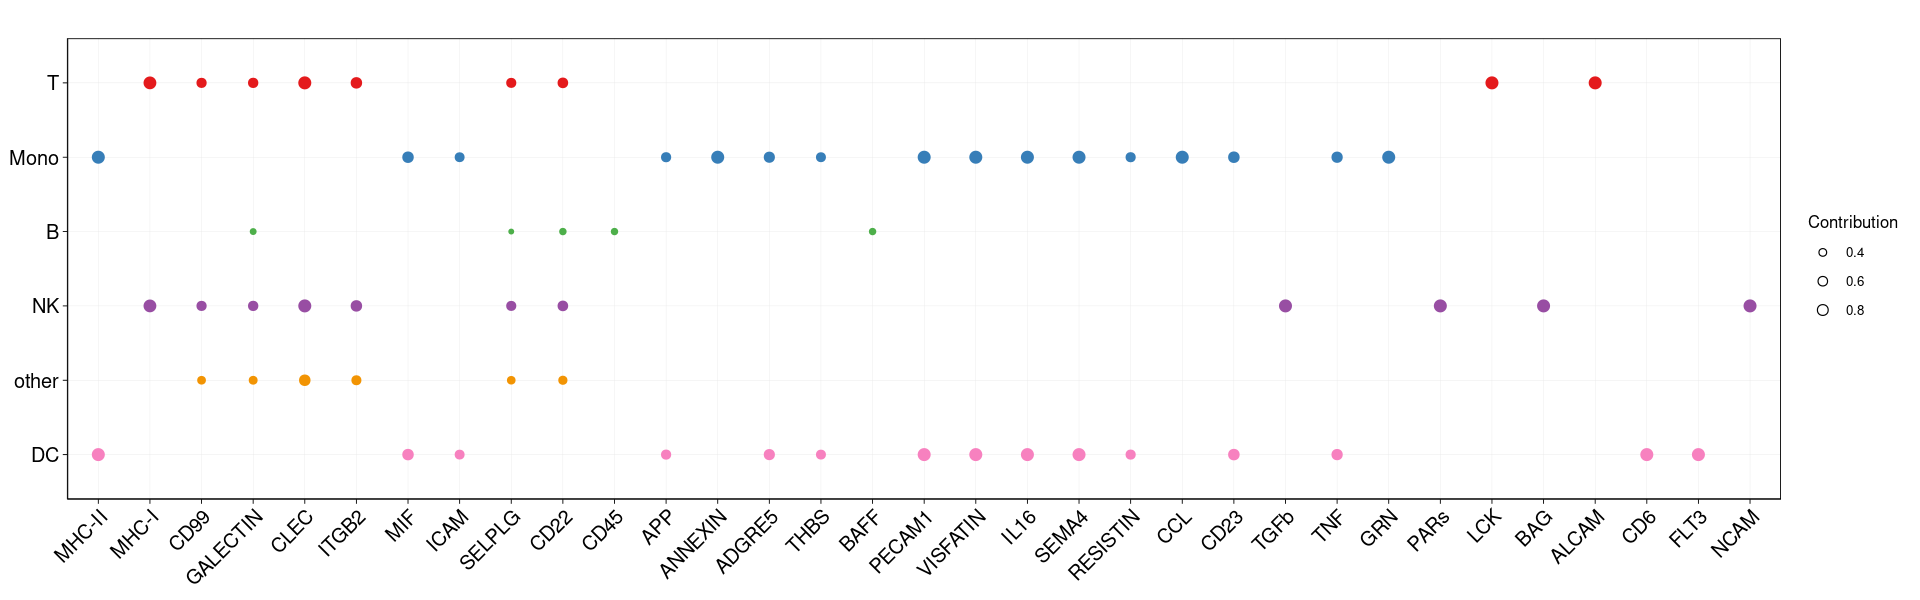

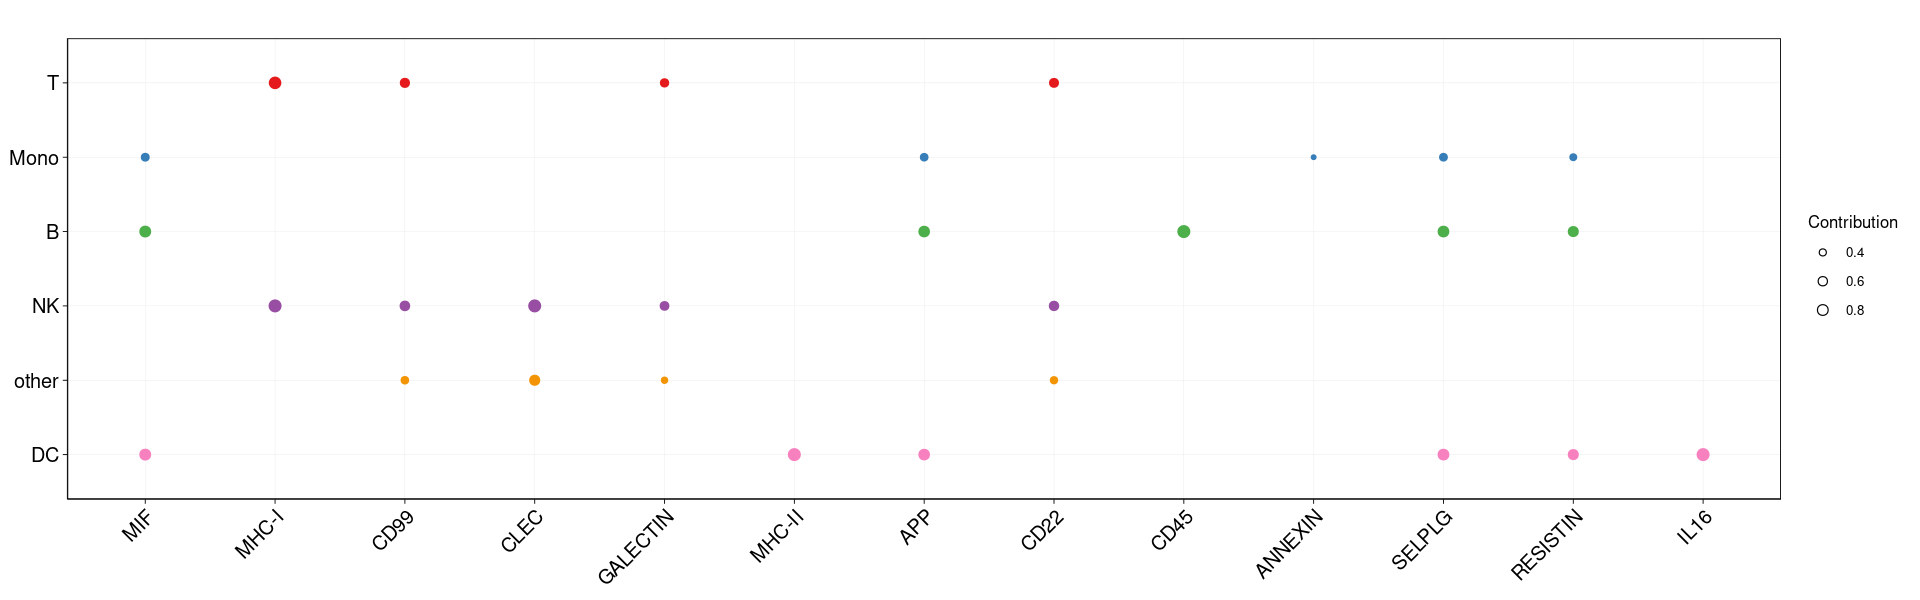

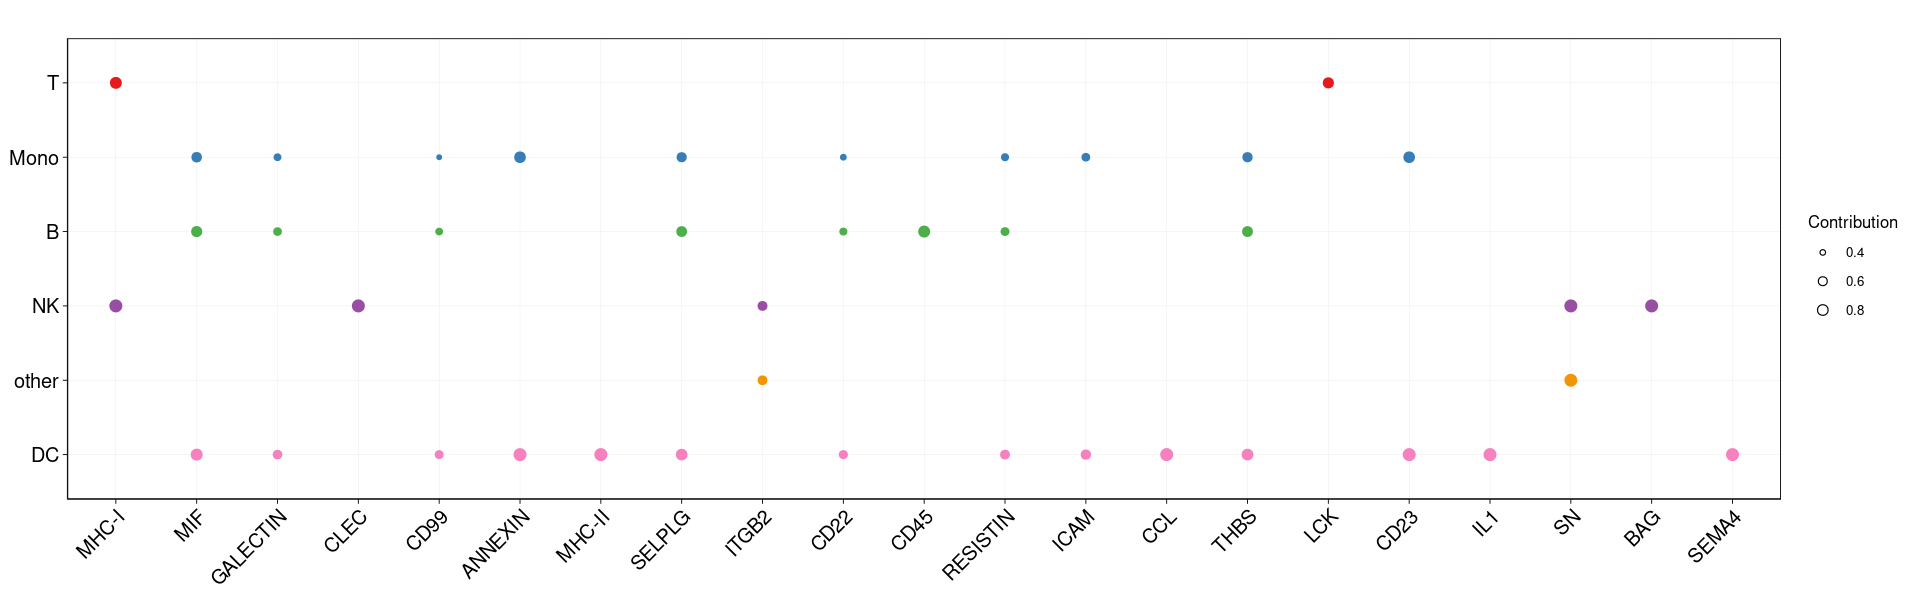

In [40]:
options(repr.plot.width=16,repr.plot.height=5)
netAnalysis_dot(object.list$HD, pattern = "incoming",font.size=15)+labs(title='',legend="")
netAnalysis_dot(object.list$aSLE, pattern = "incoming",font.size=15)+labs(title='',legend="")
netAnalysis_dot(object.list$cSLE, pattern = "incoming",font.size=15)+labs(title='',legend="")

## figure4

### figure4 A

In [1]:
ol_data<-readRDS('../merge_sle_immunonolgy_communication_cellchat.rds')

In [3]:
ol_data

$csle_heavy
An object of class CellChat created from a single dataset 
 38102 genes.
 77732 cells.
$csle_light
An object of class CellChat created from a single dataset 
 38102 genes.
 120318 cells.
$asle_heavy
An object of class CellChat created from a single dataset 
 38102 genes.
 15528 cells.
$asle_light
An object of class Seurat 
40102 features across 22080 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

$sle_flare
An object of class CellChat created from a single dataset 
 38102 genes.
 153955 cells.
$hd
An object of class CellChat created from a single dataset 
 38102 genes.
 161764 cells.

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



Compute signaling network similarity for datasets 1 2 3 
Manifold learning of the signaling networks for datasets 1 2 3 
Compute the distance of signaling networks between datasets 2 3 


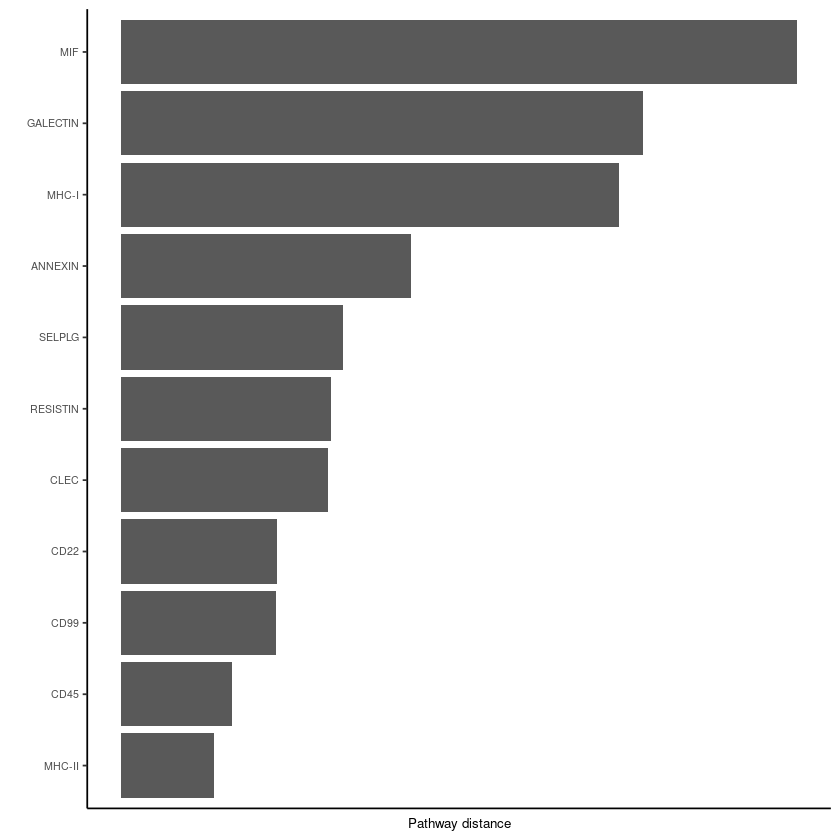

In [15]:
object.list<-ol_data[c(6,5,1)]
names(object.list)<-c('HD','aSLE','cSLE')
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
cellchat <- computeNetSimilarityPairwise(cellchat, type = "functional")
cellchat <- netEmbedding(cellchat, type = "functional")
rankSimilarity(cellchat, type = "functional",comparison2=c(2,3))

### figure4 B

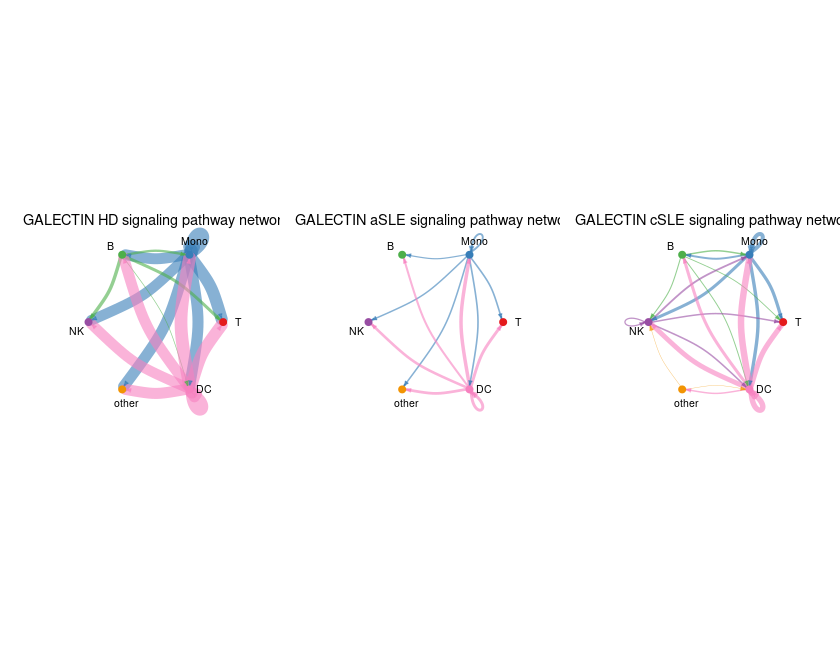

In [6]:
#GALECTIN
options(repr.plot.height=5.5)
pathways.show <- c("GALECTIN") 
weight.max <- getMaxWeight(object.list, slot.name = c("netP"), attribute = pathways.show) # control the edge weights across different datasets
par(mfrow = c(1,3), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", 
                      edge.weight.max = weight.max[1], edge.width.max = 10, 
                      signaling.name = paste(pathways.show, names(object.list)[i]))
}

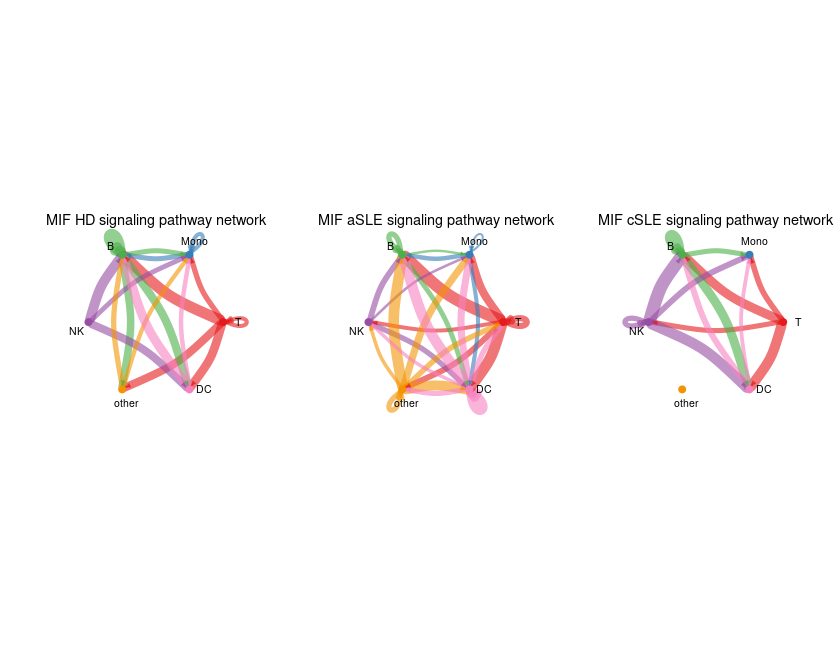

In [7]:
#MIF
options(repr.plot.height=5.5)
pathways.show <- c("MIF") 
weight.max <- getMaxWeight(object.list, slot.name = c("netP"), attribute = pathways.show) # control the edge weights across different datasets
par(mfrow = c(1,3), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", 
                      edge.weight.max = weight.max[1], edge.width.max = 10, 
                      signaling.name = paste(pathways.show, names(object.list)[i]))
}

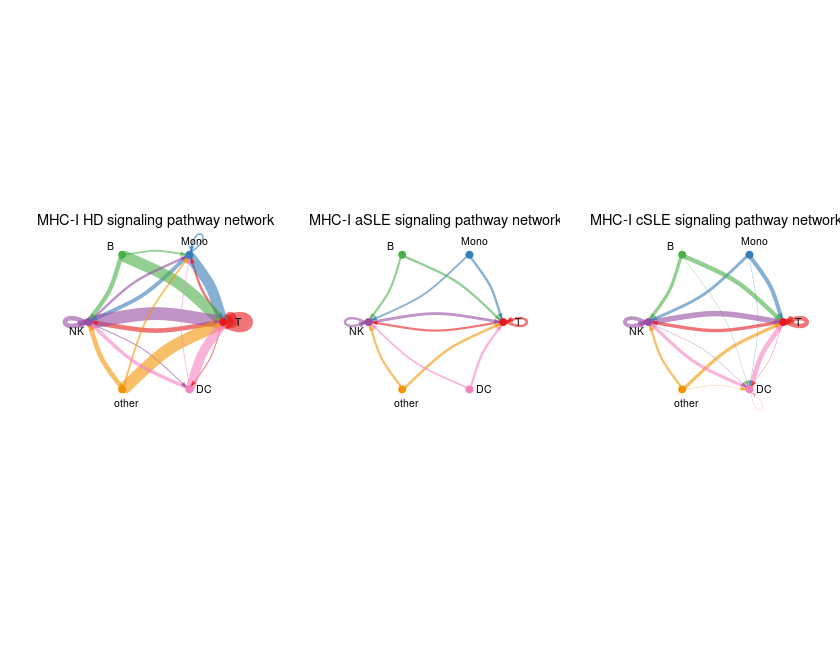

In [9]:
#MHC-I
options(repr.plot.height=5.5)
pathways.show <- c("MHC-I") 
weight.max <- getMaxWeight(object.list, slot.name = c("netP"), attribute = pathways.show) # control the edge weights across different datasets
par(mfrow = c(1,3), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", 
                      edge.weight.max = weight.max[1], edge.width.max = 10, 
                      signaling.name = paste(pathways.show, names(object.list)[i]))
}

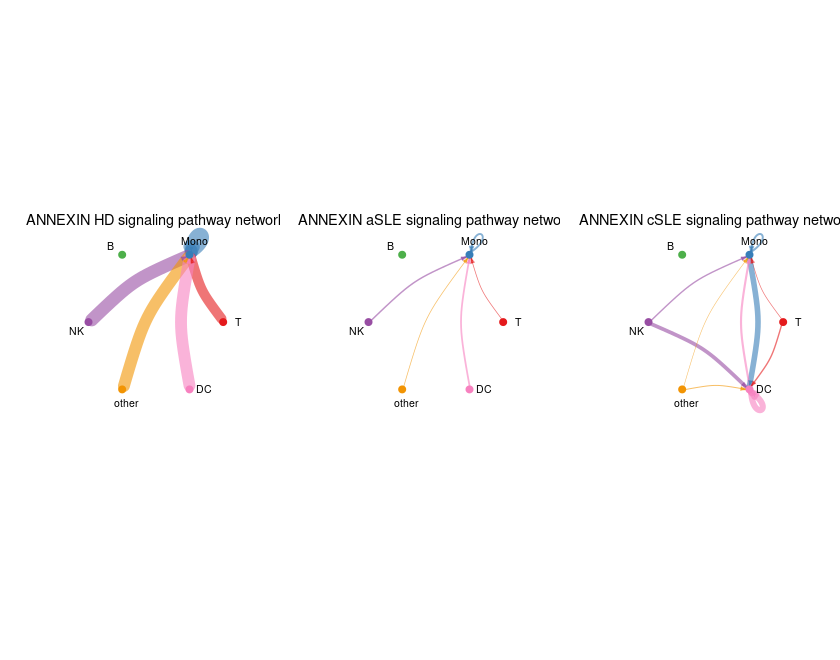

In [10]:
#ANNEXIN
options(repr.plot.height=5.5)
pathways.show <- c("ANNEXIN") 
weight.max <- getMaxWeight(object.list, slot.name = c("netP"), attribute = pathways.show) # control the edge weights across different datasets
par(mfrow = c(1,3), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", 
                      edge.weight.max = weight.max[1], edge.width.max = 10, 
                      signaling.name = paste(pathways.show, names(object.list)[i]))
}

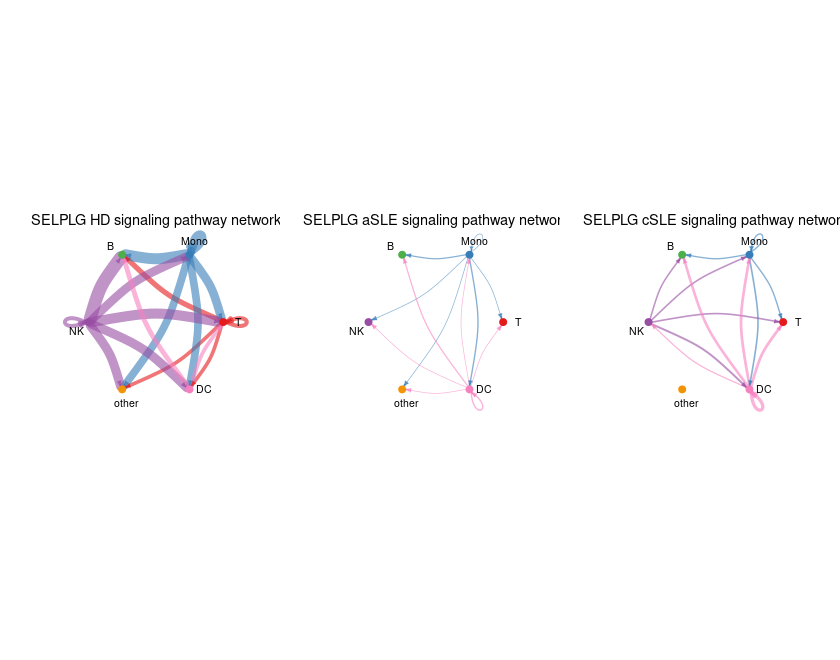

In [5]:
#SELPLG
options(repr.plot.height=5.5)
pathways.show <- c("SELPLG") 
weight.max <- getMaxWeight(object.list, slot.name = c("netP"), attribute = pathways.show) # control the edge weights across different datasets
par(mfrow = c(1,3), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", 
                      edge.weight.max = weight.max[1], edge.width.max = 10, 
                      signaling.name = paste(pathways.show, names(object.list)[i]))
}

### figure4 C+D

Comparing communications on a merged object 


Comparing communications on a merged object 




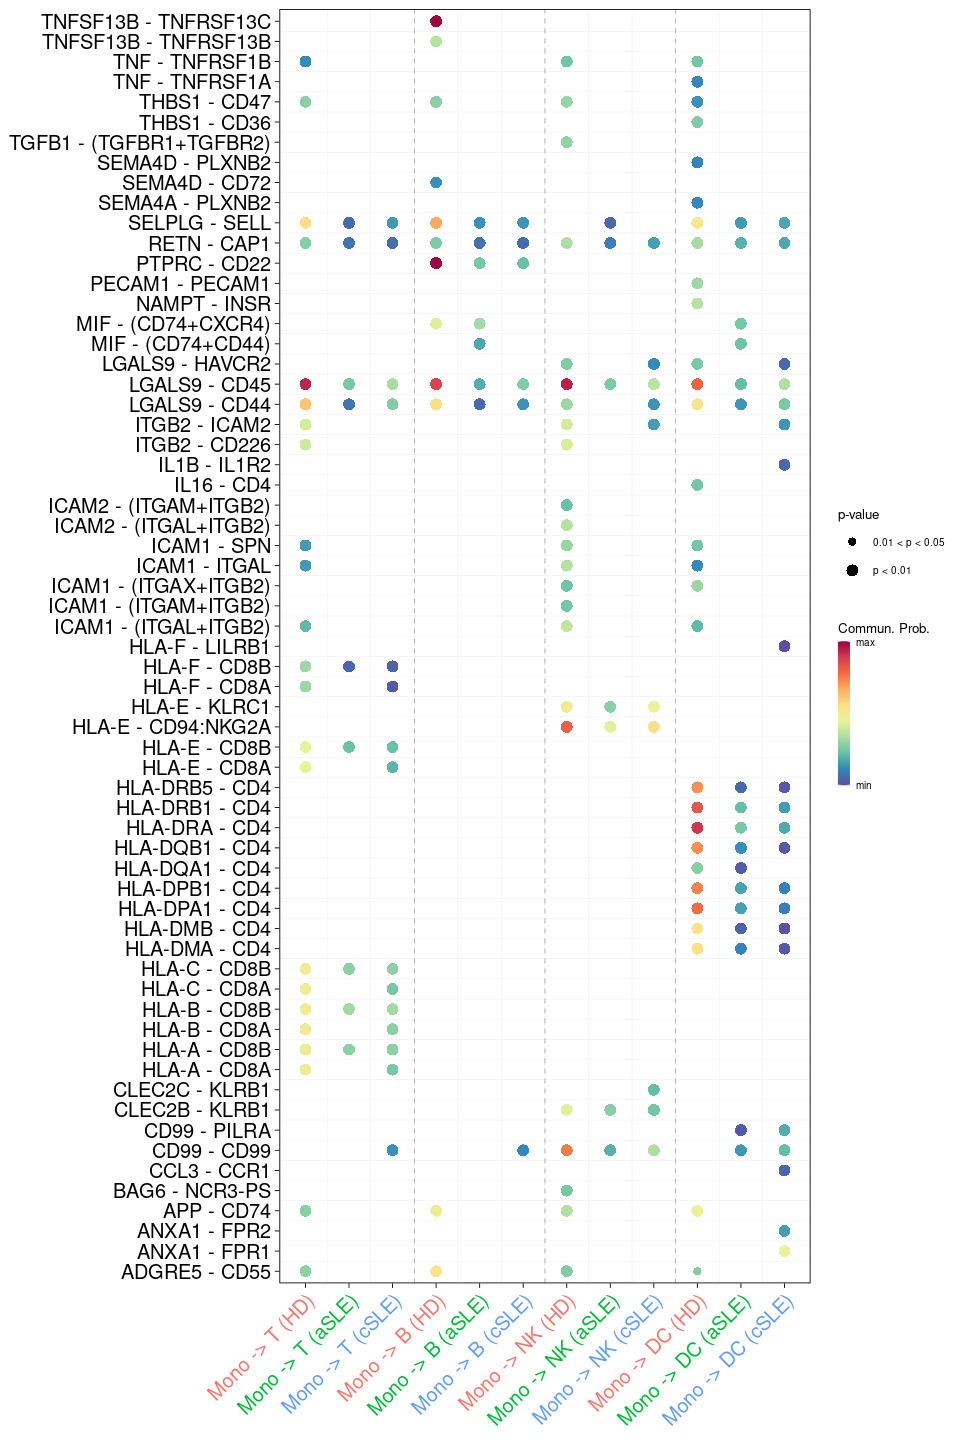

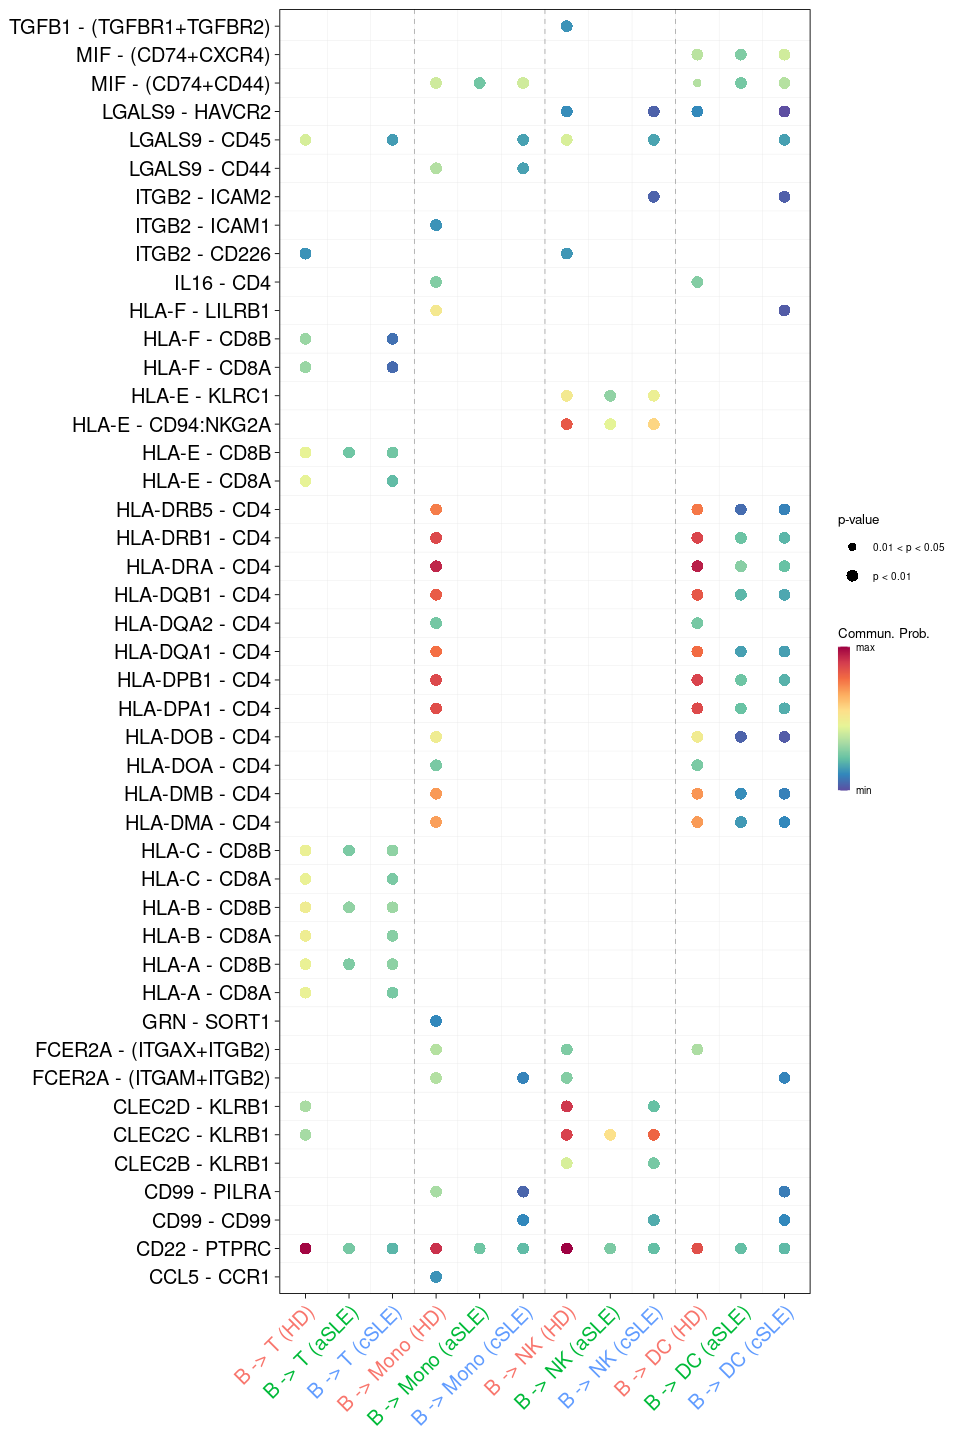

In [14]:
options(repr.plot.width=8,repr.plot.height=12)
netVisual_bubble(cellchat, sources.use = 2, targets.use = c(1,3,4,6),
                 comparison = c(1, 2,3), angle.x = 45,font.size=15)
netVisual_bubble(cellchat, sources.use = 3, targets.use = c(1,2,4,6), 
                 comparison = c(1, 2,3), angle.x = 45,font.size=15)